<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install detecto

In [2]:
!pip install torch==1.4

     |████████████████████████████████| 753.4MB 21kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


In [3]:
!pip install torchvision==0.5.0

     |████████████████████████████████| 4.0MB 4.6MB/s 
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [52]:
from detecto import core, utils, visualize
import torch
import matplotlib.pyplot as plt
from detecto.utils import read_image

In [53]:
print(torch.cuda.is_available())

True


In [54]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/object detection')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
!ls

2138674.jpeg  Connected-Home-Pie-Chart.jpg  Train  Validation


In [56]:
from detecto.utils import xml_to_csv

#xml_to_csv('xml/', 'labels.csv') 
dataset = core.Dataset('Train/')

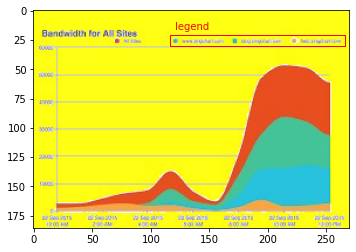

In [57]:
from detecto.visualize import show_labeled_image

image, targets = dataset[105]
show_labeled_image(image, targets['boxes'], targets['labels'])

In [ ]:
#dataset = core.Dataset('Annotations/', 'Train/')
#image, target = dataset[0]
#print(image, target)

In [59]:
model = core.Model(['title', 'legend', 'axis label'])
val_dataset = core.Dataset('Validation/')
model.fit(dataset, val_dataset, epochs=5, verbose=True, learning_rate=0.001)

Epoch 1 of 5


KeyboardInterrupt: ignored

In [12]:
model.save('/content/drive/My Drive/Colab Notebooks/Object detection model.pth')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2138674.jpeg to 2138674.jpeg


In [64]:
model2 = core.Model.load('/content/drive/My Drive/Colab Notebooks/Object detection model.pth', ['title', 'legend', 'axis label'])

In [65]:
image2 = utils.read_image('2138674.jpeg')

In [66]:
images =[]
images.append(image2)

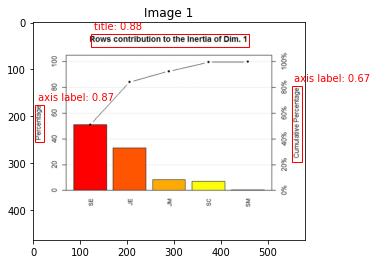

In [67]:
visualize.plot_prediction_grid(model2, images, score_filter=0.6)

In [68]:
predictions = model.predict_top(image2)
labels, boxes, scores = predictions

In [69]:
print(labels)

['title', 'axis label']


In [16]:
print(boxes)

tensor([[123.9831,  23.4857, 459.4827,  51.9592],
        [  3.9595, 175.1216,  22.7558, 253.8301]])


In [17]:
print(scores)

tensor([0.8767, 0.8708])


In [18]:
visualize.show_labeled_image(image2, boxes, labels, score_filter=0.7)

TypeError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Connected-Home-Pie-Chart.jpg to Connected-Home-Pie-Chart.jpg


In [21]:
image3 = utils.read_image('Connected-Home-Pie-Chart.jpg')
predictions3 = model.predict_top(image3)
labels3, boxes3, scores3 = predictions3

In [22]:
print(labels3)

['title', 'axis label', 'legend']


In [23]:
print(scores3)

tensor([0.6774, 0.2873, 0.9266])


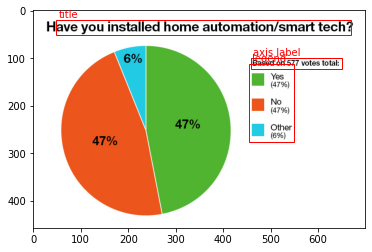

In [ ]:
visualize.show_labeled_image(image3, boxes3, labels3)